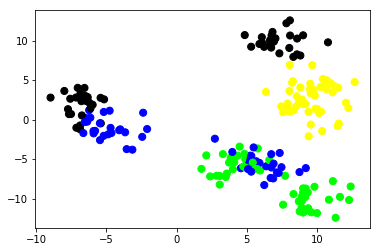

KNN  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')
Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on test set: 0.78
---------------------------------------------------------------------------------------------------------------
Test result:
Confusion_matrix:
[[9 1 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0]
 [0 0 4 0 0 2 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 7 0 0 2 0 0]
 [0 0 0 0 0 0 8 0]
 [0 0 0 0 1 0 0 5]]
Classification_report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7
           2       0.36      0.67      0.47         6
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         1
           5       0.50      0.22      0.31         9
           6       1.00      1.00  

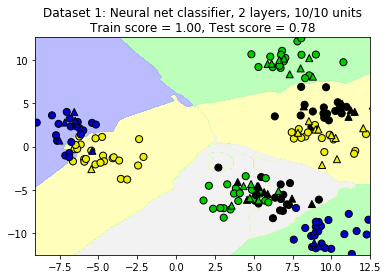

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors   
from adspy_shared_utilities import plot_class_regions_for_classifier

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
# 200 объектов разделенных на 8 классов
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2, centers = 8, 
                        cluster_std = 1.3, random_state = 4)
# отображение данных на графике
plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# тренировочное и тестовое множества
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# классификатор и его обучение, используя данные тренировочного множества
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') 

clf.fit(X_train, y_train)

# результат классификации на тестовом наборе данных
predictions = clf.predict(X_test)
print('KNN ', clf)

# качество классификации на тренировочном и тестовом множествах
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print('---------------------------------------------------------------------------------------------------------------')
print('Test result:')
print('Confusion_matrix:')
print(confusion_matrix(y_test,predictions))
print('Classification_report:')
print(classification_report(y_test,predictions))
print('---------------------------------------------------------------------------------------------------------------')

plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test,'Dataset 1: Neural net classifier, 2 layers, 10/10 units')